In [22]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import  scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

Loading the dataset into variables. I appended "_orig" to the image datasets as I will preprocess them later.

In [23]:
train_dataset = h5py.File('Data/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('Data/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:])

# print(train_set_y.shape)
# print(test_set_y.shape)
train_set_y= train_set_y.reshape(1, train_set_y.shape[0])
test_set_y = test_set_y.reshape(1, test_set_y.shape[0])
# print(train_set_y.shape)
# print(test_set_y.shape)

Each line of train_set_x_orig and test_set_x_orig is an array representing an image. Visualizing it with the following code.

y = [1]. It's a cat picture.


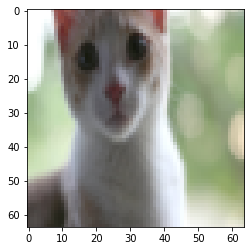

In [24]:
index = 135
plt.imshow(train_set_x_orig[index])
print('y = ' + str(train_set_y[:, index]) + ". It's a " + str(classes[np.squeeze(train_set_y[:, index])].decode("utf-8")) + " picture." )

Flattening _Numpy_ RGB array of shape (pix, pix, 3) to a single vector of shape (pix * pix * 3, 1). Then we transpose this to to obtain a _numpy_ array where every column represents a flattened image.

Passing _-1_ as a parameter means numpy will figure out the dimensions by looking at the 'length of the array and remaining dimensions' and making sure that the new shape is compatible with the original shape.

In [25]:
# print(train_set_x_orig.shape)
# print(test_set_x_orig.shape)
train_set_x_reshaped = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_reshaped = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
# print(train_set_x_reshaped.shape)
# print(test_set_x_reshaped.shape)

A common preprocessing step in machine learning is to center and standardize your dataset, meaning that you subtract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for image datasets we can just divide every row by 255 as it is the maximum value of a pixel channel.

In [26]:
train_set_x = train_set_x_reshaped/255
test_set_x = test_set_x_reshaped/255

### Helper Functions:

Creating a sigmoid helper function.

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1/(1 + np.exp(-z))
    return s

Creating a helper function to initialize parameters with zeroes.

In [ ]:
def initialize_with_zeroes(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    w = np.zeros(dim, 1)
    b = 0
    return w, b